In [100]:
#import packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#### Data Import and Preparation 

In [2]:
#import data
item_id = pd.read_csv('item_to_id.csv')
purchase_hist = pd.read_csv('purchase_history.csv')
item_id.head()

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39


In [3]:
purchase_hist.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


#### Details of user behavior and item purchased hist

In [50]:
purchase_hist_expand = purchase_hist.set_index(purchase_hist['user_id']).id.str.split(',',expand=True).stack()\
    .reset_index().rename(columns={0:'id'}).loc[:,purchase_hist.columns]
purchase_hist_expand['id'] = purchase_hist_expand['id'].astype('int')
purchase_hist_expand.columns = ['user_id','Item_id']

In [54]:
total = purchase_hist_expand.merge(item_id,on = 'Item_id')
total.head()

,user_id,Item_id,Item_name
0,222087,27,dishwashing
1,404134,27,dishwashing
2,987613,27,dishwashing
3,60201,27,dishwashing
4,1166671,27,dishwashing


In [72]:
#top 10 customers who bought the most items overall in her lifetime
test = total[['user_id','Item_name']].groupby('user_id').count()
test['Item_name'].sort_values(ascending = False)[0:10]

user_id
269335     72
367872     70
599172     64
397623     64
377284     63
1485538    62
917199     62
718218     60
653800     60
828721     58
Name: Item_name, dtype: int64

In [74]:
#top 10 items, the customer who bought that product the most
test2 = total[['user_id','Item_name']].groupby('Item_name').count()
test2['user_id'].sort_values(ascending = False)[0:10]

Item_name
lettuce        14473
sugar           9119
cucumbers       9050
cherries        9019
apples          9008
broccoli        8980
grapefruit      8951
bananas         8921
cauliflower     8902
berries         8878
Name: user_id, dtype: int64

In [79]:
#each customers the most items that they bought
test3 = total[['user_id','Item_name']].groupby(['user_id','Item_name']).count()
test3.groupby('user_id').head(1)

,
user_id,Item_name
47,aluminum foil
68,beef
113,aluminum foil
123,baby items
223,apples
...,...
1499730,cauliflower
1499778,apples
1499797,bagels


#### Cluster Item

In [96]:
Q2 = purchase_hist_expand.reset_index()
Q2 = Q2.groupby(['user_id','Item_id']).index.count().reset_index().pivot(index='Item_id', columns='user_id', values = 'index').fillna(0)

In [97]:
Q2.head()

user_id,47,68,113,123,223,281,323,394,420,453,...,1499502,1499523,1499563,1499702,1499727,1499730,1499778,1499797,1499817,1499974
Item_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [98]:
# determine the best number of clusters
clusters = range(2, 30)
inertias = []
silhouettes = []

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=2020, n_jobs=-1)
    kmeans = kmeans.fit(Q2)
    label = kmeans.predict(Q2)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(Q2, label))

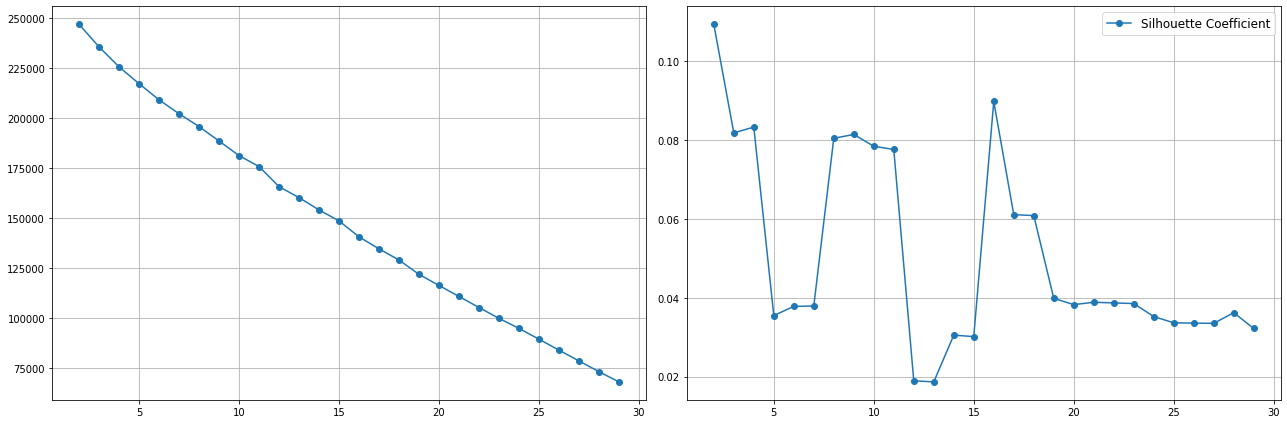

In [101]:
# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].plot(clusters, inertias, 'o-', label='Sum of Squared Distances')
ax[0].grid(True)
ax[1].plot(clusters, silhouettes, 'o-', label='Silhouette Coefficient')
ax[1].grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

The graph shows that 12 or 13 clusters would have the best small silhouette Coefficient

In [102]:
# build K-Means model
kmeans = KMeans(n_clusters=12, init='k-means++', random_state=2020, n_jobs=-1)
kmeans = kmeans.fit(Q2)
label = kmeans.predict(Q2)

In [103]:
# PCA for dimension reduction
pca = PCA(n_components=2, random_state=2020)
pca = pca.fit(Q2)
pca_feature = pca.transform(Q2)

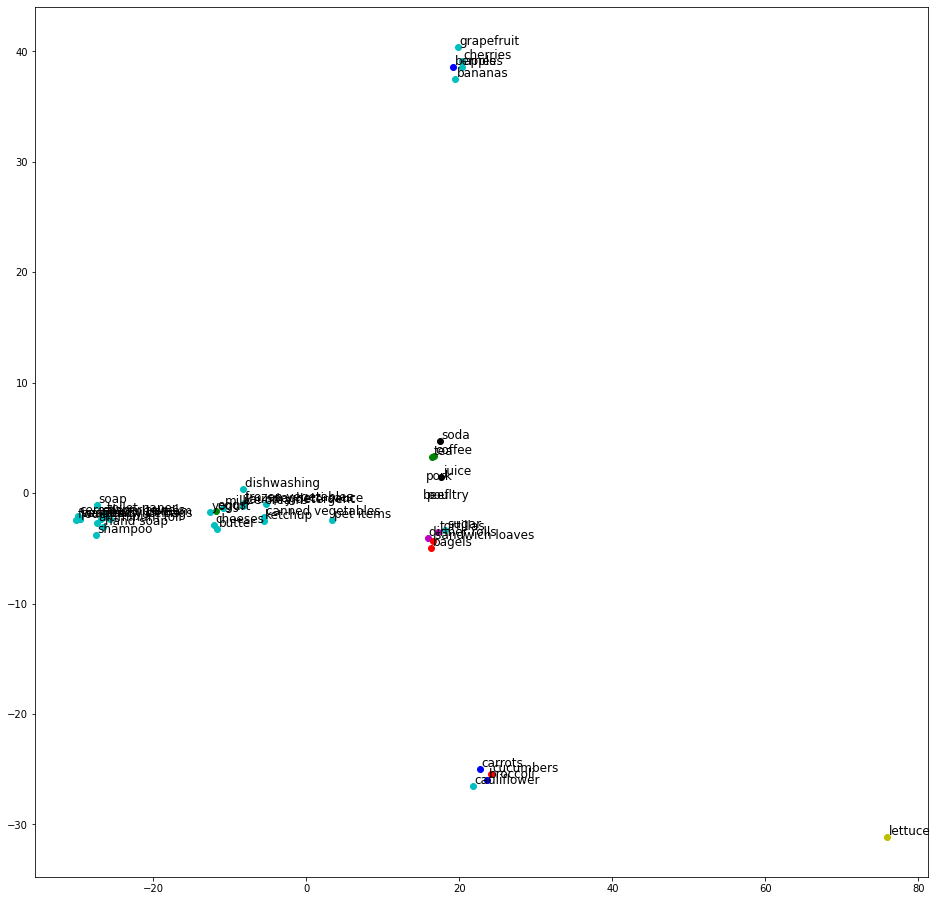

In [105]:
# visualization in 2D
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig, ax = plt.subplots(figsize=(16, 16))
for j in range(len(pca_feature)):
    x = pca_feature[j][0]
    y = pca_feature[j][1]
    ax.plot(x, y, 'o', color=colors[label[j] % 8])
    name = item_id[item_id['Item_id'] == j + 1]['Item_name']
    ax.annotate(xy=(x+0.2, y+0.2), s=name.values[0], fontsize=12)

plt.show()

In [107]:
# print useful information
df = pd.DataFrame({'Item_id': list(range(1, 49)), 'label': label})
df = pd.merge(left=df, right=item_id, on='Item_id', how='left')

for i in range(0, 12):
    print(i, '\t', list(df[df['label'] == i]['Item_name']))

0 	 ['carrots', 'broccoli']
1 	 ['eggs']
2 	 ['bagels', 'sandwich loaves']
3 	 ['sugar', 'pet items', 'baby items', 'waffles', 'sandwich bags', 'butter', 'cereals', 'shampoo', 'aluminum foil', 'milk', 'laundry detergent', 'shaving cream', 'cheeses', 'frozen vegetables', 'paper towels', 'spaghetti sauce', 'dishwashing\xa0', 'canned vegetables', 'hand soap', 'flour', 'pasta', 'toilet paper', 'soap', 'ice cream', 'ketchup', 'cauliflower', 'yogurt']
4 	 ['tortillas', 'dinner rolls']
5 	 ['lettuce']
6 	 ['soda', 'juice']
7 	 ['poultry', 'beef', 'pork']
8 	 ['berries']
9 	 ['tea', 'coffee']
10 	 ['cucumbers']
11 	 ['grapefruit', 'cherries', 'apples', 'bananas']
